In [1]:
# Import the required Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Data
df = pd.read_csv('/content/COVID19 - COVID19.csv')
pd.set_option('display.max_columns', None)
df.head(9)

/tmp/ipython-input-218316373.py:2: DtypeWarning: Columns (8,9,10,13,16,20,24,32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/COVID19 - COVID19.csv')


,Sex,Birth Year,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Digested blood or coffee grounds in vomit,Pain behind eyes or Sensitivity to light,Bleeding from the eyes,Fatigue or general weakness,Fever,Fluid in the lung cavity,Fluid in lung cavity in auscultation,Fluid in cavity through X-Ray,Bleeding of the gums,Headache,Joint pain or arthritis,Thorax (sore throat),Malaise,Muscle pain,Nausea,Other clinical symptoms,Pharyngeal exudate,Rapid breathing,Runny nose,Maculopapular rash,Sore throat or pharyngitis,Bleeding or bruising,Vomiting,Abnormal lung X-Ray findings,Conjunctivitis,Acute respiratory distress syndrome,Pneumonia (clinical or radiologic),Loss of Taste,Loss of Smell,Cough with sputum,Cough with heamoptysis,Enlarged lymph nodes,Wheezing,Skin ulcers,Inability to walk,Indrawing of chest wall,Other complications,Specify other complications,Result
0,MALE,1967.0,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,NO,NO,NaN,NO,NO,NaN,NO,NO,NO,NaN,NO,NO,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1.0,NaN,PENDING
1,MALE,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MALE,1988.0,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,NO,YES,NaN,NO,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NaN,NO,NO,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
3,MALE,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FEMALE,1978.0,NO,NO,NO,YES,NO,YES,NaN,NaN,NaN,NO,NO,NaN,NO,NO,NaN,NO,NO,YES,NO,NO,NO,NO,NO,NO,YES,NaN,YES,NaN,NO,NO,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
5,MALE,1995.0,NO,NO,NO,YES,NO,NO,NaN,NaN,NaN,NO,NO,NaN,NO,NO,NaN,NO,NO,YES,NO,NO,NO,NO,NO,NO,YES,NaN,YES,NaN,NO,NO,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
6,MALE,1967.0,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,NO,YES,NaN,NO,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NaN,NO,NO,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
7,MALE,2015.0,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,NO,NO,NaN,NO,NO,NaN,NO,NO,NO,NaN,NO,NO,NO,NaN,NaN,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,1.0,NaN,NEGATIVE
8,MALE,1991.0,NO,NO,NO,NO,NO,NO,NaN,NaN,NaN,NO,NO,NaN,NO,NO,NaN,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NaN,NO,NO,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE


# Data Preparation

In [3]:
# Rename columns (replace spaces with underscores)
df.columns = df.columns.str.replace(" ", "_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 47 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Sex                                        107228 non-null  object 
 1   Birth_Year                                 94963 non-null   float64
 2   Chest_pain                                 42120 non-null   object 
 3   Chills_or_sweats                           24857 non-null   object 
 4   Confused_or_disoriented                    23127 non-null   object 
 5   Cough                                      42218 non-null   object 
 6   Diarrhea                                   42092 non-null   object 
 7   Difficulty_breathing_or_Dyspnea            24940 non-null   object 
 8   Digested_blood_or_coffee_grounds_in_vomit  1397 non-null    object 
 9   Pain_behind_eyes_or_Sensitivity_to_light   1405 non-null    object 
 10  Bleeding

In [4]:
#checking for missing values
df.isnull().sum().sort_values(ascending=False)

,0
Specify_other_complications,109922
Bleeding_from_the_eyes,108530
Digested_blood_or_coffee_grounds_in_vomit,108530
Bleeding_of_the_gums,108530
Fluid_in_the_lung_cavity,108523
Pain_behind_eyes_or_Sensitivity_to_light,108522
Pharyngeal_exudate,106928
Malaise,106921
Conjunctivitis,91274
Other_complications,89175


In [5]:
#since the data contain lot of missin value; columns having more than 70% of missing values is not worth keeping, so dropping the column will be better.
to_drop = df.columns[df.isnull().mean() > 0.7]
print("Columns to drop:", list(to_drop))
df = df.drop(columns=to_drop)


Columns to drop: ['Chills_or_sweats', 'Confused_or_disoriented', 'Difficulty_breathing_or_Dyspnea', 'Digested_blood_or_coffee_grounds_in_vomit', 'Pain_behind_eyes_or_Sensitivity_to_light', 'Bleeding_from_the_eyes', 'Fluid_in_the_lung_cavity', 'Fluid_in_lung_cavity_in_auscultation', 'Fluid_in_cavity_through_X-Ray', 'Bleeding_of_the_gums', 'Joint_pain_or_arthritis', 'Malaise', 'Muscle_pain', 'Other_clinical_symptoms', 'Pharyngeal_exudate', 'Rapid_breathing', 'Maculopapular_rash', 'Bleeding_or_bruising', 'Abnormal_lung_X-Ray_findings', 'Conjunctivitis', 'Acute_respiratory_distress_syndrome', 'Pneumonia_(clinical_or_radiologic)', 'Cough_with_sputum', 'Cough_with_heamoptysis', 'Enlarged_lymph_nodes', 'Wheezing', 'Skin_ulcers', 'Inability_to_walk', 'Indrawing_of_chest_wall', 'Other_complications', 'Specify_other_complications']


In [6]:
df = df.drop(columns=["Sore_throat_or_pharyngitis"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Sex                          107228 non-null  object 
 1   Birth_Year                   94963 non-null   float64
 2   Chest_pain                   42120 non-null   object 
 3   Cough                        42218 non-null   object 
 4   Diarrhea                     42092 non-null   object 
 5   Fatigue_or_general_weakness  42158 non-null   object 
 6   Fever                        42229 non-null   object 
 7   Headache                     42080 non-null   object 
 8   Thorax_(sore_throat)         40670 non-null   object 
 9   Nausea                       40674 non-null   object 
 10  Runny_nose                   40677 non-null   object 
 11  Vomiting                     40669 non-null   object 
 12  Loss_of_Taste                39837 non-null   object 
 13 

In [7]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Sex                          109927 non-null  object 
 1   Birth_Year                   109927 non-null  float64
 2   Chest_pain                   109927 non-null  object 
 3   Cough                        109927 non-null  object 
 4   Diarrhea                     109927 non-null  object 
 5   Fatigue_or_general_weakness  109927 non-null  object 
 6   Fever                        109927 non-null  object 
 7   Headache                     109927 non-null  object 
 8   Thorax_(sore_throat)         109927 non-null  object 
 9   Nausea                       109927 non-null  object 
 10  Runny_nose                   109927 non-null  object 
 11  Vomiting                     109927 non-null  object 
 12  Loss_of_Taste                109927 non-null  object 
 13 

In [8]:
df.isnull().sum().sort_values(ascending=False)

,0
Sex,0
Birth_Year,0
Chest_pain,0
Cough,0
Diarrhea,0
Fatigue_or_general_weakness,0
Fever,0
Headache,0
Thorax_(sore_throat),0
Nausea,0


In [9]:
df = df[df["Result"].isin(["POSITIVE", "NEGATIVE"])]
df["Result"] = df["Result"].map({"POSITIVE": 1, "NEGATIVE": 0})
print(df["Result"].value_counts())

Result
0    83882
1     4330
Name: count, dtype: int64


In [10]:
df.sample(12)

,Sex,Birth_Year,Chest_pain,Cough,Diarrhea,Fatigue_or_general_weakness,Fever,Headache,Thorax_(sore_throat),Nausea,Runny_nose,Vomiting,Loss_of_Taste,Loss_of_Smell,Result
53022,MALE,1993.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
57134,MALE,1998.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
74808,MALE,1992.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
86391,MALE,1988.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
43738,MALE,1990.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
71322,MALE,2005.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
61779,MALE,1990.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
21435,MALE,1995.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
95242,FEMALE,1992.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
27339,MALE,1993.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0


In [11]:
df.nunique()

,0
Sex,3
Birth_Year,115
Chest_pain,3
Cough,3
Diarrhea,3
Fatigue_or_general_weakness,3
Fever,3
Headache,3
Thorax_(sore_throat),3
Nausea,3


In [12]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 50)

Column: Sex
['MALE' 'FEMALE' 'UNKNOWN']
--------------------------------------------------
Column: Birth_Year
[1976. 1988. 1980. 1978. 1995. 1967. 2015. 1991. 1998. 1973. 1969. 1982.
 1986. 1961. 1997. 1974. 1984. 1994. 1959. 1993. 1949. 1996. 1957. 2000.
 1999. 1992. 1985. 1977. 1989. 1979. 1948. 1945. 1960. 1970. 1953. 2001.
 1975. 1944. 1987. 1955. 1968. 2013. 1958. 1990. 1937. 2005. 1947. 1981.
 2003. 1972. 1963. 1956. 1965. 1966. 1964. 1946. 1951. 1971. 2010. 1983.
 1950. 2011. 2009. 2012. 2002. 2017. 2018. 1962. 2004. 2014. 2006. 2016.
 2007. 2008. 1954. 1952. 1942. 1939. 2020. 1935. 1923. 1926. 1936. 1943.
 1938. 2019. 1941. 1940. 1929. 1930. 1907. 1931. 1934. 1900. 1904. 1920.
 1932. 1925. 1919. 1918. 1927. 1906. 1909. 1922. 1933. 1901. 1928. 1911.
 1913. 2021. 1921. 1916. 1908. 1914. 1903.]
--------------------------------------------------
Column: Chest_pain
['NO' 'YES' 'UNKNOWN']
--------------------------------------------------
Column: Cough
['NO' 'YES' 'UNKNOWN']
--------

In [13]:
df = df[~df.select_dtypes(include="object").isin(["UNKNOWN"]).any(axis=1)]
df.nunique()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87868 entries, 1 to 109925
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          87868 non-null  object 
 1   Birth_Year                   87868 non-null  float64
 2   Chest_pain                   87868 non-null  object 
 3   Cough                        87868 non-null  object 
 4   Diarrhea                     87868 non-null  object 
 5   Fatigue_or_general_weakness  87868 non-null  object 
 6   Fever                        87868 non-null  object 
 7   Headache                     87868 non-null  object 
 8   Thorax_(sore_throat)         87868 non-null  object 
 9   Nausea                       87868 non-null  object 
 10  Runny_nose                   87868 non-null  object 
 11  Vomiting                     87868 non-null  object 
 12  Loss_of_Taste                87868 non-null  object 
 13  Loss_of_Smell       

# Feature Engineering

In [14]:
# Calculating the number of symptom per patient
exclude_cols = ['Sex', 'Birth_Year', 'Result']

symptom_cols = [col for col in df.columns if col not in exclude_cols]
df_symptoms = df[symptom_cols].replace({'YES': 1, 'NO': 0})

# Create symptom count
df['Symptom_Count'] = df_symptoms.sum(axis=1)
print(df[['Symptom_Count', 'Result']].sample(10))

/tmp/ipython-input-1450149727.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_symptoms = df[symptom_cols].replace({'YES': 1, 'NO': 0})


        Symptom_Count  Result
75260               0       0
2111                0       0
9731                0       0
37032               0       0
58186               0       0
92570               0       0
29216               0       0
76148               0       0
101684              0       0
90843               0       0


In [15]:
# Define Gastrointestinal (GI) symptom columns
gi_cols = ["Diarrhea", "Vomiting", "Nausea"]

df_gi = df[gi_cols].replace({'YES': 1, 'NO': 0})
df["GI_Symptom_Count"] = df_gi.sum(axis=1)

#creating a binary flag (1 if any GI symptom present, else 0)
df["GI_Symptom_Flag"] = (df["GI_Symptom_Count"] > 0).astype(int)

print(df[gi_cols + ["GI_Symptom_Count", "GI_Symptom_Flag"]].sample(10))

/tmp/ipython-input-2808226011.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_gi = df[gi_cols].replace({'YES': 1, 'NO': 0})


      Diarrhea Vomiting Nausea  GI_Symptom_Count  GI_Symptom_Flag
17236       NO       NO     NO                 0                0
87779       NO       NO     NO                 0                0
52262       NO       NO     NO                 0                0
57028       NO       NO     NO                 0                0
87520       NO       NO     NO                 0                0
51721       NO       NO     NO                 0                0
12481       NO       NO     NO                 0                0
76107       NO       NO     NO                 0                0
64905       NO       NO     NO                 0                0
94856       NO       NO     NO                 0                0


In [16]:
# Define Neurological symptom columns
neuro_cols = ["Headache", "Loss_of_Smell", "Loss_of_Taste"]

df_neuro = df[neuro_cols].replace({'YES': 1, 'NO': 0})
df["Neuro_Symptom_Count"] = df_neuro.sum(axis=1)

#creating a binary flag (1 if any Neuro symptom present, else 0)
df["Neuro_Symptom_Flag"] = (df["Neuro_Symptom_Count"] > 0).astype(int)

print(df[neuro_cols + ["Neuro_Symptom_Count", "Neuro_Symptom_Flag"]].sample(20))

/tmp/ipython-input-3628201904.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_neuro = df[neuro_cols].replace({'YES': 1, 'NO': 0})


       Headache Loss_of_Smell Loss_of_Taste  Neuro_Symptom_Count  \
55810        NO            NO            NO                    0   
54158        NO            NO            NO                    0   
49599        NO            NO            NO                    0   
26949        NO            NO            NO                    0   
49273        NO            NO            NO                    0   
60824        NO            NO            NO                    0   
69509        NO            NO            NO                    0   
102469       NO            NO            NO                    0   
7526         NO            NO            NO                    0   
50931        NO            NO            NO                    0   
36951        NO            NO            NO                    0   
43811        NO            NO            NO                    0   
32950        NO            NO            NO                    0   
32264        NO            NO            NO     

In [17]:
df.head()

,Sex,Birth_Year,Chest_pain,Cough,Diarrhea,Fatigue_or_general_weakness,Fever,Headache,Thorax_(sore_throat),Nausea,Runny_nose,Vomiting,Loss_of_Taste,Loss_of_Smell,Result,Symptom_Count,GI_Symptom_Count,GI_Symptom_Flag,Neuro_Symptom_Count,Neuro_Symptom_Flag
1,MALE,1976.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,0,0,0,0
2,MALE,1988.0,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,0,1,0,0,0,0
3,MALE,1980.0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0,0,0,0,0,0
4,FEMALE,1978.0,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,0,3,0,0,0,0
5,MALE,1995.0,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,0,3,0,0,0,0


# Model Building Pipeline

In [18]:
!pip install imbalanced-learn

In [19]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['Result','Birth_Year'])

y = df['Result']

In [20]:
# Split into train and test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(65901, 18) (65901,)
(21967, 18) (21967,)


## *Apply Data Preparation on Train Data*

In [21]:
X_train.dtypes

,0
Sex,object
Chest_pain,object
Cough,object
Diarrhea,object
Fatigue_or_general_weakness,object
Fever,object
Headache,object
Thorax_(sore_throat),object
Nausea,object
Runny_nose,object


In [22]:
# Separating Categorical and Numerical Columns
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [23]:
X_train_cat.head(3)

,Sex,Chest_pain,Cough,Diarrhea,Fatigue_or_general_weakness,Fever,Headache,Thorax_(sore_throat),Nausea,Runny_nose,Vomiting,Loss_of_Taste,Loss_of_Smell
50294,MALE,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
95235,MALE,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
73980,MALE,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [24]:
X_train_num.head()

,Symptom_Count,GI_Symptom_Count,GI_Symptom_Flag,Neuro_Symptom_Count,Neuro_Symptom_Flag
50294,0,0,0,0,0
95235,0,0,0,0,0
73980,0,0,0,0,0
29260,0,0,0,0,0
78656,0,0,0,0,0


In [25]:
#Applying Label Encoder on the Caategorical Columns
from sklearn.preprocessing import LabelEncoder

X_train_cat_transformed = X_train_cat.copy()
le_dict = {}

for col in X_train_cat_transformed.columns:
    le = LabelEncoder()
    X_train_cat_transformed[col] = le.fit_transform(X_train_cat_transformed[col])
    le_dict[col] = le

X_train_cat_transformed.head()

,Sex,Chest_pain,Cough,Diarrhea,Fatigue_or_general_weakness,Fever,Headache,Thorax_(sore_throat),Nausea,Runny_nose,Vomiting,Loss_of_Taste,Loss_of_Smell
50294,1,0,0,0,0,0,0,0,0,0,0,0,0
95235,1,0,0,0,0,0,0,0,0,0,0,0,0
73980,1,0,0,0,0,0,0,0,0,0,0,0,0
29260,1,0,0,0,0,0,0,0,0,0,0,0,0
78656,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                    columns = std_scaler.get_feature_names_out(),
                                    index = X_train_num.index)

X_train_num_transformed.head()

,Symptom_Count,GI_Symptom_Count,GI_Symptom_Flag,Neuro_Symptom_Count,Neuro_Symptom_Flag
50294,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437
95235,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437
73980,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437
29260,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437
78656,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437


In [27]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,Symptom_Count,GI_Symptom_Count,GI_Symptom_Flag,Neuro_Symptom_Count,Neuro_Symptom_Flag,Sex,Chest_pain,Cough,Diarrhea,Fatigue_or_general_weakness,Fever,Headache,Thorax_(sore_throat),Nausea,Runny_nose,Vomiting,Loss_of_Taste,Loss_of_Smell
50294,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,1,0,0,0,0,0,0,0,0,0,0,0,0
95235,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,1,0,0,0,0,0,0,0,0,0,0,0,0
73980,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,1,0,0,0,0,0,0,0,0,0,0,0,0
29260,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,1,0,0,0,0,0,0,0,0,0,0,0,0
78656,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,0,0,0,0,0,0,0,0,0,0,0,0,0


## *Apply Data Preparation on Test Data*

In [28]:
# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [29]:
# Apply transformation on Numerical data

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num),
                                   columns = std_scaler.get_feature_names_out(),
                                   index = X_test_num.index)

X_test_num_transformed.head()

,Symptom_Count,GI_Symptom_Count,GI_Symptom_Flag,Neuro_Symptom_Count,Neuro_Symptom_Flag
16639,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437
86048,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437
53907,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437
5782,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437
80806,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437


In [30]:
#Applying Label Encoder on the Caategorical Columns
X_test_cat_transformed = X_test_cat.copy()

for col in X_test_cat_transformed.columns:
    le = le_dict[col]
    X_test_cat_transformed[col] = le.transform(X_test_cat_transformed[col])

X_test_cat_transformed.head()

,Sex,Chest_pain,Cough,Diarrhea,Fatigue_or_general_weakness,Fever,Headache,Thorax_(sore_throat),Nausea,Runny_nose,Vomiting,Loss_of_Taste,Loss_of_Smell
16639,1,0,0,0,0,0,0,0,0,0,0,0,0
86048,0,0,0,0,0,0,0,0,0,0,0,0,0
53907,1,0,0,0,0,0,0,0,0,0,0,0,0
5782,1,0,0,0,0,0,0,0,0,0,0,0,0
80806,1,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Concatinate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,Symptom_Count,GI_Symptom_Count,GI_Symptom_Flag,Neuro_Symptom_Count,Neuro_Symptom_Flag,Sex,Chest_pain,Cough,Diarrhea,Fatigue_or_general_weakness,Fever,Headache,Thorax_(sore_throat),Nausea,Runny_nose,Vomiting,Loss_of_Taste,Loss_of_Smell
16639,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,1,0,0,0,0,0,0,0,0,0,0,0,0
86048,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,0,0,0,0,0,0,0,0,0,0,0,0,0
53907,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,1,0,0,0,0,0,0,0,0,0,0,0,0
5782,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,1,0,0,0,0,0,0,0,0,0,0,0,0
80806,-0.134443,-0.062737,-0.068413,-0.098917,-0.107437,1,0,0,0,0,0,0,0,0,0,0,0,0


# Model Training and Evaluation

In [32]:
# Handle class imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_transformed, y_train = smote.fit_resample(X_train_transformed, y_train)

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve)
from sklearn.datasets import make_classification




import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)

In [34]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }
}

In [35]:
#model trainin with cross-validations
def train_models_with_cv(models, param_grids, X_train_transformed, y_train):
    """
    Train models using GridSearchCV for hyperparameter tuning
    """
    best_models = {}
    cv_results = {}

    # Set up cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Perform grid search with cross-validation
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=cv,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_train_transformed, y_train)

        # Store the best model and results
        best_models[name] = grid_search.best_estimator_
        cv_results[name] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'cv_results': grid_search.cv_results_
        }

        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best CV score for {name}: {grid_search.best_score_:.4f}")

    return best_models, cv_results

# Train all models
best_models, cv_results = train_models_with_cv(models, param_grids, X_train_transformed, y_train)


Training Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV score for Logistic Regression: 0.5385

Training Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score for Decision Tree: 0.5390

Training Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best CV score for Random Forest: 0.5394

Training Gradient Boosting...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best CV score for Gradient Boosting: 0.5393


In [36]:
#Model Evaluation
def evaluate_models(models, X_test_transformed, y_test):
    """
    Evaluate all models on test data
    """
    results = {}

    for name, model in models.items():
        # Make predictions
        y_pred = model.predict(X_test_transformed)
        y_pred_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # AUC-ROC if probabilities are available
        auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

        # Store results
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc_roc': auc_roc,
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        if auc_roc is not None:
            print(f"AUC-ROC: {auc_roc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

    return results

# Evaluate all models
results = evaluate_models(best_models, X_test_transformed, y_test)


Logistic Regression Results:
Accuracy: 0.9434
Precision: 0.2625
Recall: 0.0769
F1 Score: 0.1190
AUC-ROC: 0.5279
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20875
           1       0.26      0.08      0.12      1092

    accuracy                           0.94     21967
   macro avg       0.61      0.53      0.54     21967
weighted avg       0.92      0.94      0.93     21967


Decision Tree Results:
Accuracy: 0.9450
Precision: 0.2552
Recall: 0.0559
F1 Score: 0.0917
AUC-ROC: 0.5108
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20875
           1       0.26      0.06      0.09      1092

    accuracy                           0.94     21967
   macro avg       0.60      0.52      0.53     21967
weighted avg       0.92      0.94      0.93     21967


Random Forest Results:
Accuracy: 0.9451
Precision: 0.2694
Recall: 0.0604
F1 Sco

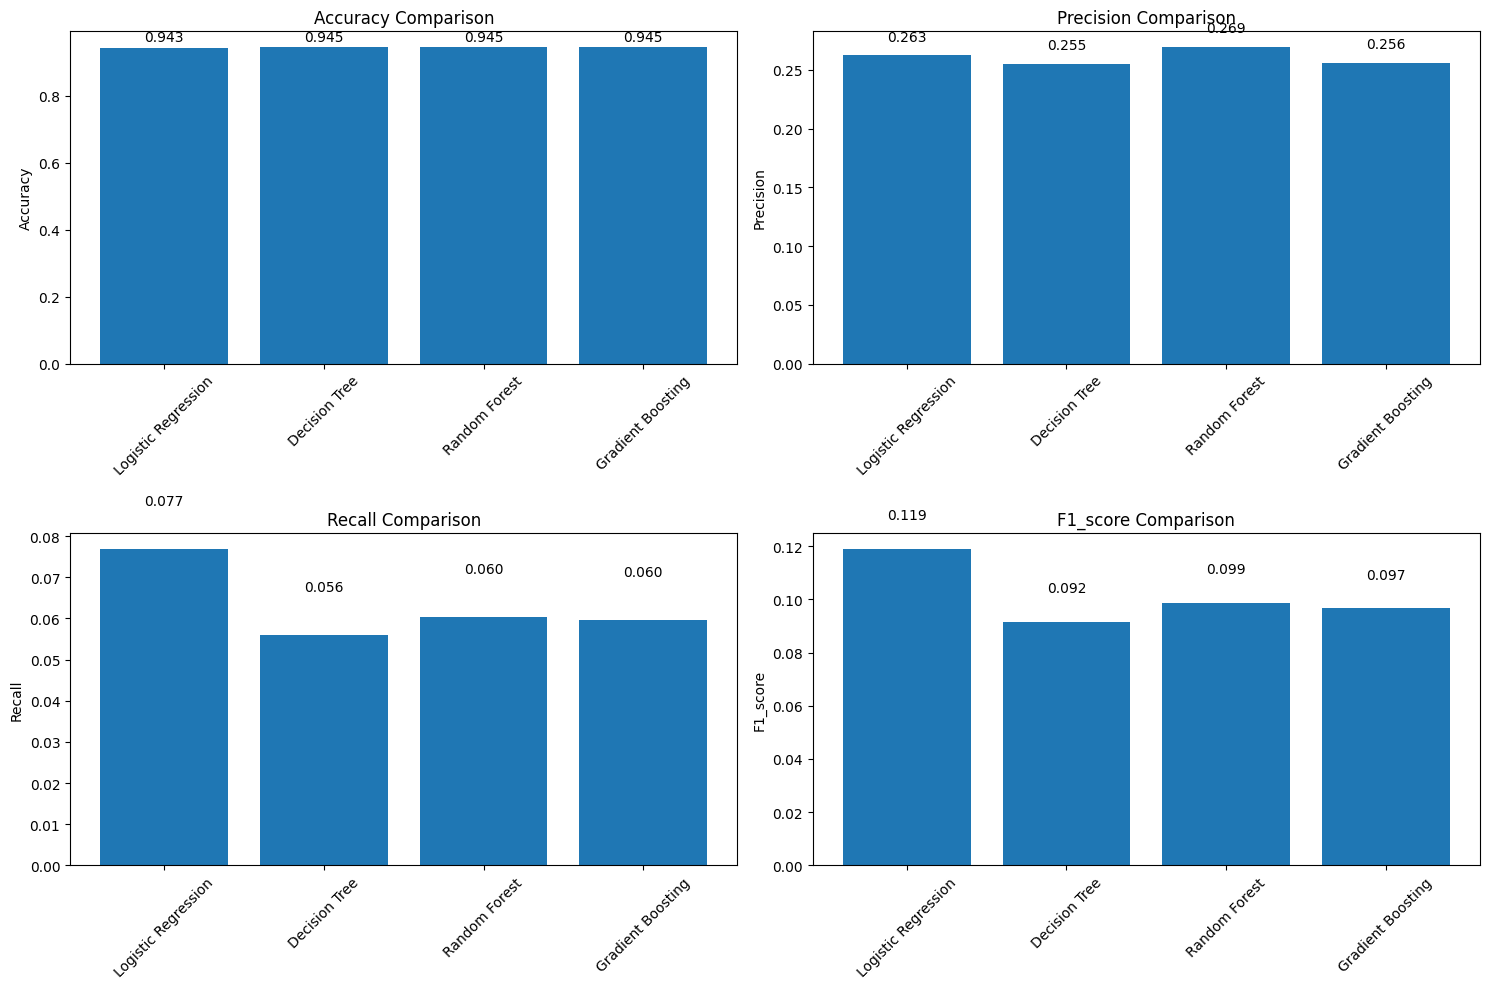

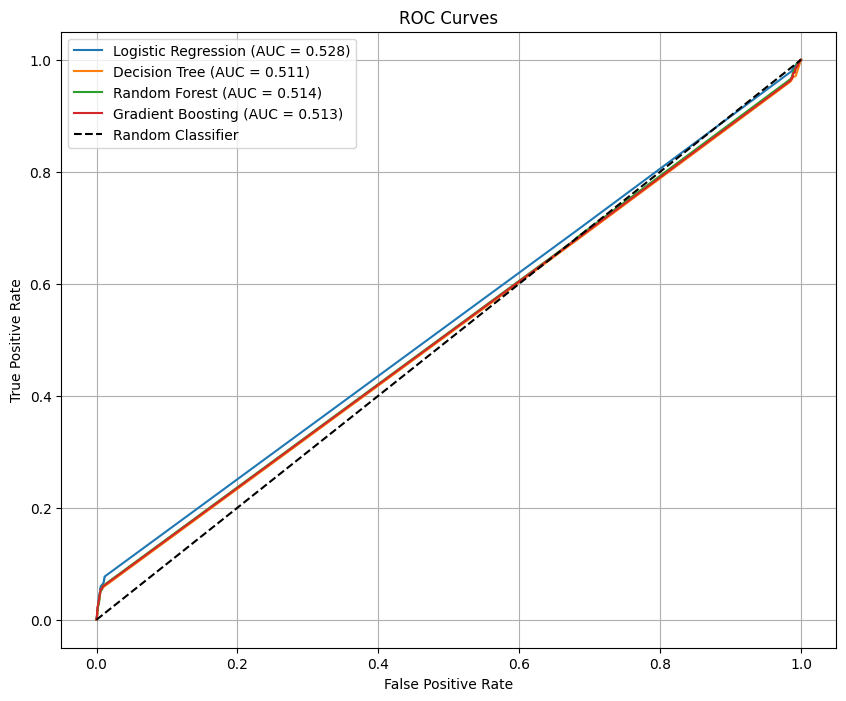

In [37]:
def plot_model_comparison(results):
    """
    Create visual comparison of model performance
    """
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    model_names = list(results.keys())

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        values = [results[model][metric] for model in model_names]
        axes[i].bar(model_names, values)
        axes[i].set_title(f'{metric.capitalize()} Comparison')
        axes[i].set_ylabel(metric.capitalize())
        axes[i].tick_params(axis='x', rotation=45)

        # Add value labels on bars
        for j, v in enumerate(values):
            axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plot comparison
plot_model_comparison(results)

# Plot ROC curves
def plot_roc_curves(results, y_test):
    """
    Plot ROC curves for all models
    """
    plt.figure(figsize=(10, 8))

    for name, result in results.items():
        if result['y_pred_proba'] is not None:
            fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
            auc_score = result['auc_roc']
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curves(results, y_test)

# Model Interpretation

**Why Logistic Regression is the Best:**
- Highest Recall (7.69%) - Most important for catching positive cases

- Highest F1 Score (11.90%) - Best balance between precision and recall

- Highest AUC-ROC (52.79%) - Best overall ranking performance

- Good Precision (26.25%) - Reasonable precision given the recall

In [38]:
logistic_model = best_models['Logistic Regression']

In [39]:
#Productionizing model
import joblib

# Save the pipeline to a file
joblib.dump(logistic_model, 'covid_model.pkl')

['covid_model.pkl']